# E-commerce Customer Data - Behavioral Analysis

## 1. Load Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 2. Load Dataset


In [2]:
df = pd.read_csv(r"C:\Users\HP\Documents\EDA Files\E comm customer data for behaviour analysis.csv")

## 3. Initial Exploration and Cleaning


In [3]:
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
# Check missing values
df.isna().sum()

# Fill missing values in 'Returns' with 0 (assumption: no return)
df["Returns"] = df["Returns"].fillna(0).astype(int)

# Drop redundant columns
df.drop(columns=["Age", "Customer ID"], inplace=True)

# Convert Purchase Date to datetime
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])


## 4. Feature Engineering


In [5]:
df["Year"] = df["Purchase Date"].dt.year.astype(int)
df["Month"] = df["Purchase Date"].dt.month.astype(int)

# Create Synthetic Order ID (to count unique transactions)
df["Synthetic Order ID"] = df["Customer Name"].astype(str) + "_" + df["Purchase Date"].astype(str)

# Calculate return rate
total_orders = df["Synthetic Order ID"].nunique()
returned_orders = df[df["Returns"] == 1]["Synthetic Order ID"].nunique()
return_rate = (returned_orders / total_orders) * 100

print(f"Return Rate: {return_rate:.2f}%")

# First and last purchase date
first_pur_date = df.groupby("Customer Name")["Purchase Date"].min()
last_pur_date = df.groupby("Customer Name")["Purchase Date"].max()


Return Rate: 40.59%


In [6]:
df

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Year,Month,Synthetic Order ID
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,Female,0,2023,5,John Rivera_2023-05-03 21:30:02
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,Female,0,2021,5,John Rivera_2021-05-16 13:57:44
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,Female,0,2020,7,John Rivera_2020-07-13 06:16:57
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,Female,0,2023,1,John Rivera_2023-01-17 13:14:36
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,Female,0,2021,5,John Rivera_2021-05-01 11:29:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0,Gabriel Williams,Male,0,2023,1,Gabriel Williams_2023-01-24 12:32:18
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1,Barry Foster,Female,0,2021,6,Barry Foster_2021-06-04 05:45:25
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,0,Lisa Johnson,Female,0,2022,11,Lisa Johnson_2022-11-10 17:11:57
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1,Melissa Fernandez,Male,0,2021,6,Melissa Fernandez_2021-06-27 14:42:12


In [7]:
df.dtypes

Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                           int32
Customer Name                    object
Gender                           object
Churn                             int64
Year                              int32
Month                             int32
Synthetic Order ID               object
dtype: object

In [8]:
df["Year"] = pd.to_datetime(df["Year"], format='%Y')

In [9]:
df.dtypes

Purchase Date            datetime64[ns]
Product Category                 object
Product Price                     int64
Quantity                          int64
Total Purchase Amount             int64
Payment Method                   object
Customer Age                      int64
Returns                           int32
Customer Name                    object
Gender                           object
Churn                             int64
Year                     datetime64[ns]
Month                             int32
Synthetic Order ID               object
dtype: object

In [10]:
df

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Year,Month,Synthetic Order ID
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,Female,0,2023-01-01,5,John Rivera_2023-05-03 21:30:02
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,Female,0,2021-01-01,5,John Rivera_2021-05-16 13:57:44
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,Female,0,2020-01-01,7,John Rivera_2020-07-13 06:16:57
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,Female,0,2023-01-01,1,John Rivera_2023-01-17 13:14:36
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,Female,0,2021-01-01,5,John Rivera_2021-05-01 11:29:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0,Gabriel Williams,Male,0,2023-01-01,1,Gabriel Williams_2023-01-24 12:32:18
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1,Barry Foster,Female,0,2021-01-01,6,Barry Foster_2021-06-04 05:45:25
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,0,Lisa Johnson,Female,0,2022-01-01,11,Lisa Johnson_2022-11-10 17:11:57
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1,Melissa Fernandez,Male,0,2021-01-01,6,Melissa Fernandez_2021-06-27 14:42:12


## 5. Descriptive EDA + Visualizations


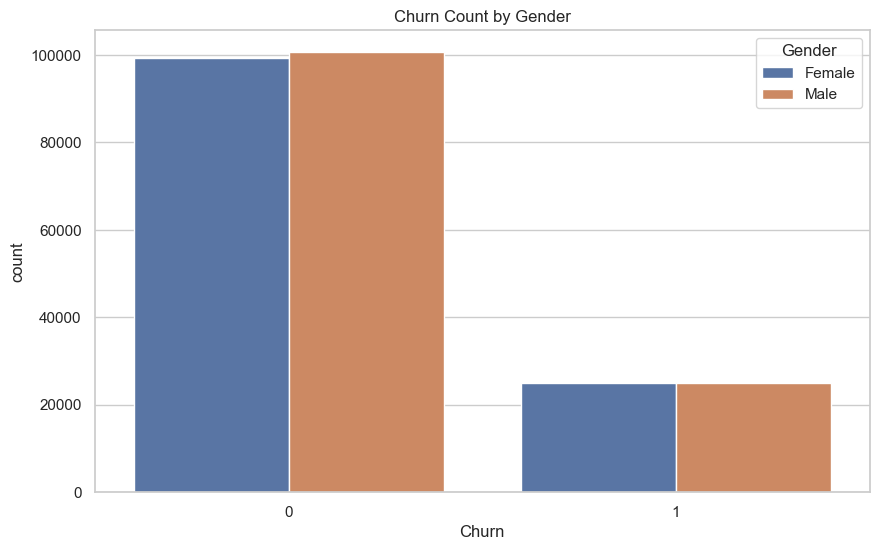

In [11]:
# Churn Count by Gender
sns.countplot(data=df, x="Churn", hue="Gender")
plt.title("Churn Count by Gender")
plt.show()


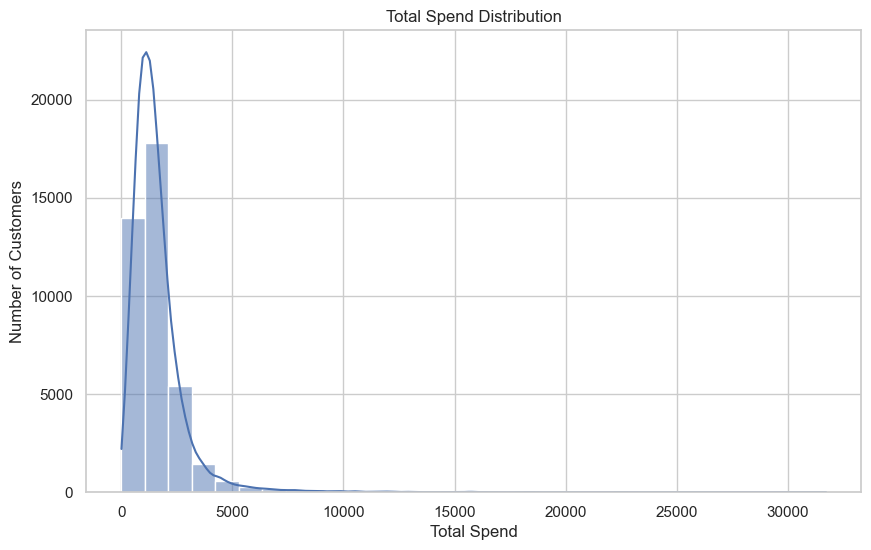

In [12]:
# Total Spend per Customer
total_spend = df.groupby("Customer Name")["Product Price"].sum().reset_index()

sns.histplot(data=total_spend, x="Product Price", bins=30, kde=True)
plt.title("Total Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.show()


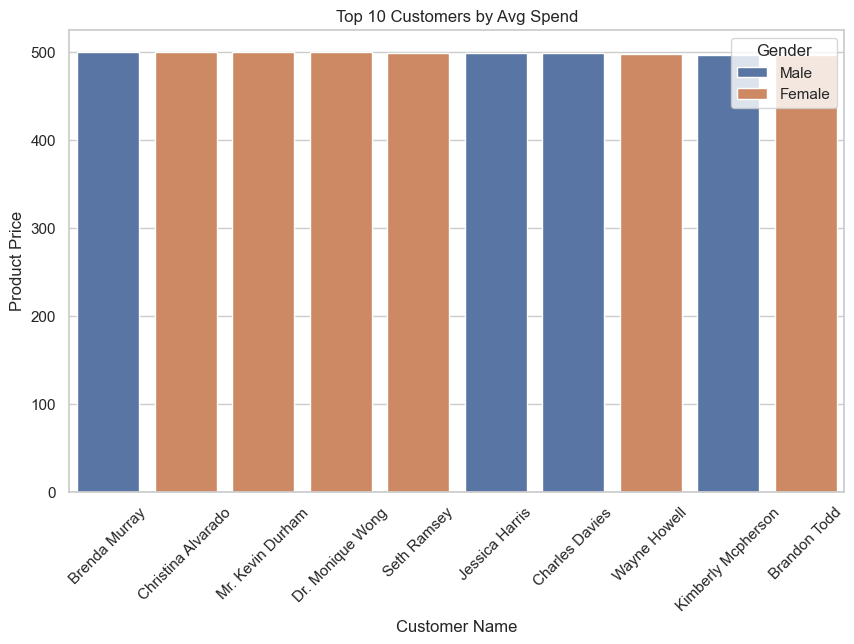

In [13]:
# Average Order Value (Top 10 Customers)
avg_spend = df.groupby(["Customer Name", "Gender"])["Product Price"].mean().reset_index()

sns.barplot(data=avg_spend.sort_values("Product Price", ascending=False).head(10),
            x="Customer Name", y="Product Price", hue="Gender")
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Avg Spend")
plt.show()


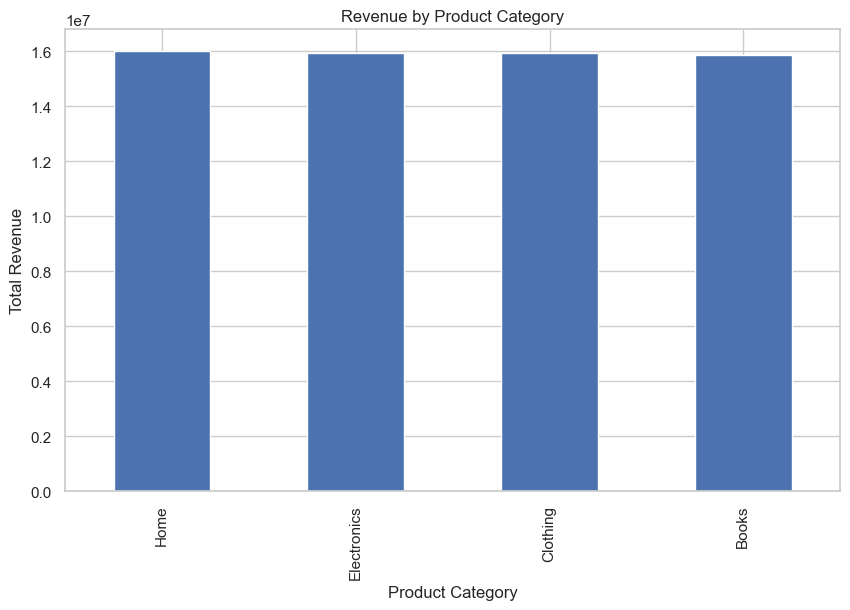

In [14]:
# Revenue by Product Category
df.groupby("Product Category")["Product Price"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.show()


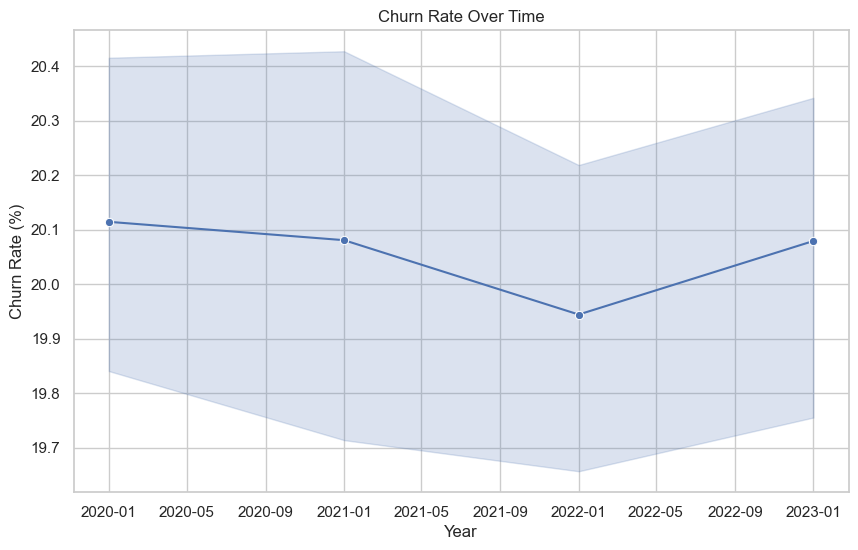

In [15]:
# Churn Over Time (Yearly)
df["Churn"] = df["Churn"].astype(int)
churn_time = df.groupby(["Year", "Month"])["Churn"].mean().reset_index()
churn_time["Churn"] *= 100

sns.lineplot(data=churn_time, x="Year", y="Churn", marker='o')
plt.title("Churn Rate Over Time")
plt.ylabel("Churn Rate (%)")
plt.show()


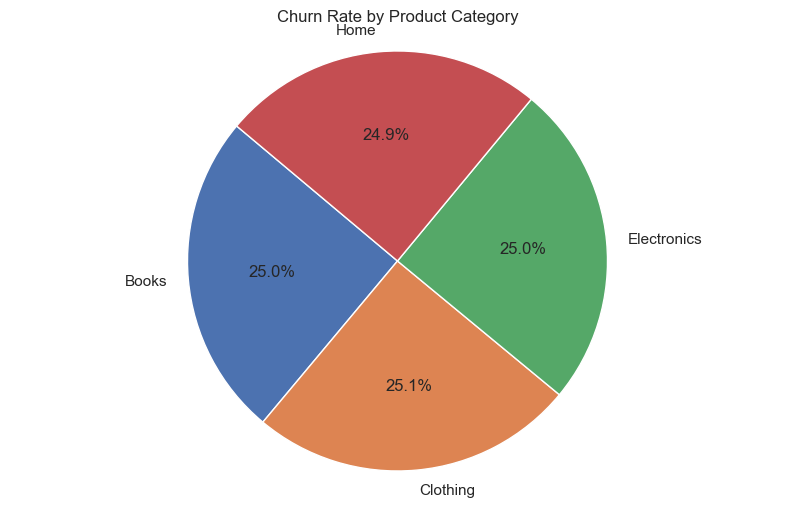

In [16]:
# Churn by Product Category
churn_cat = df.groupby("Product Category")["Churn"].mean().reset_index()
plt.pie(churn_cat["Churn"], labels=churn_cat["Product Category"], autopct='%1.1f%%', startangle=140)
plt.title("Churn Rate by Product Category")
plt.axis('equal')
plt.show()


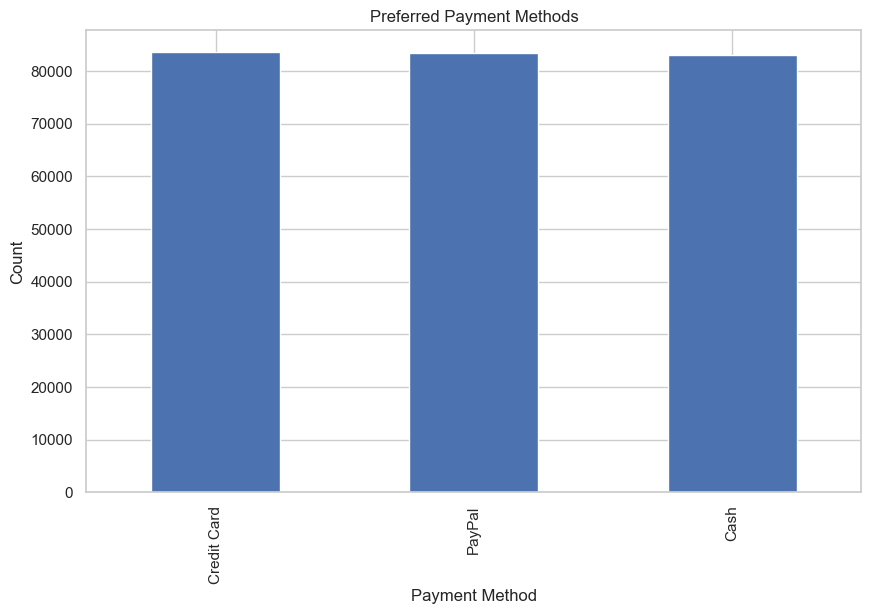

In [17]:
# Payment Method Preference
df["Payment Method"].value_counts().plot(kind='bar')
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


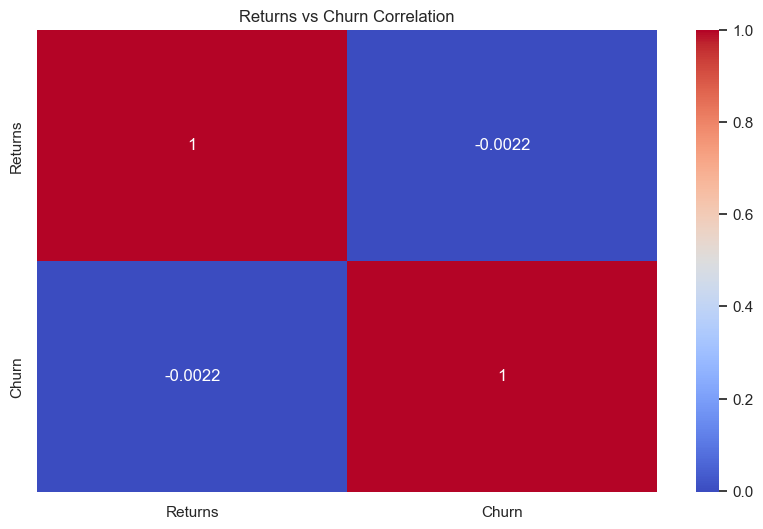

In [18]:
# Correlation: Returns vs Churn
sns.heatmap(df[["Returns", "Churn"]].corr(), annot=True, cmap='coolwarm')
plt.title("Returns vs Churn Correlation")
plt.show()


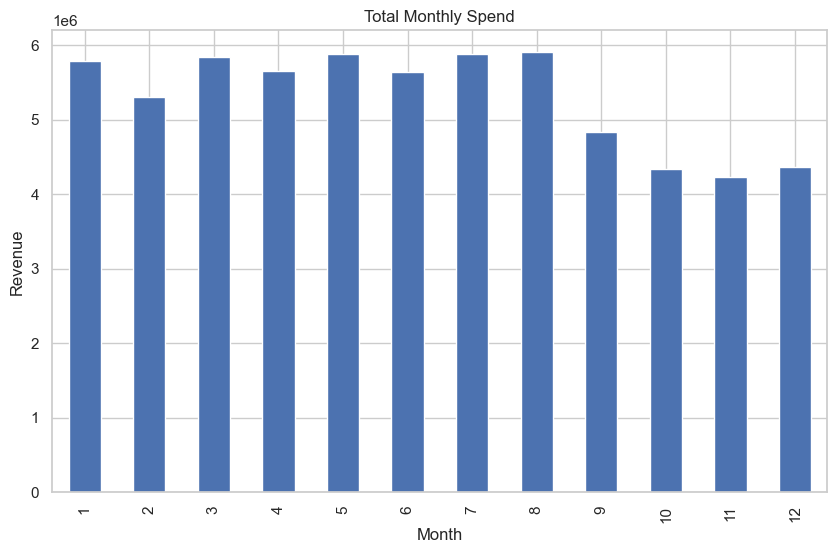

In [19]:
# Total Spend by Month
df.groupby("Month")["Product Price"].sum().plot(kind='bar')
plt.title("Total Monthly Spend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


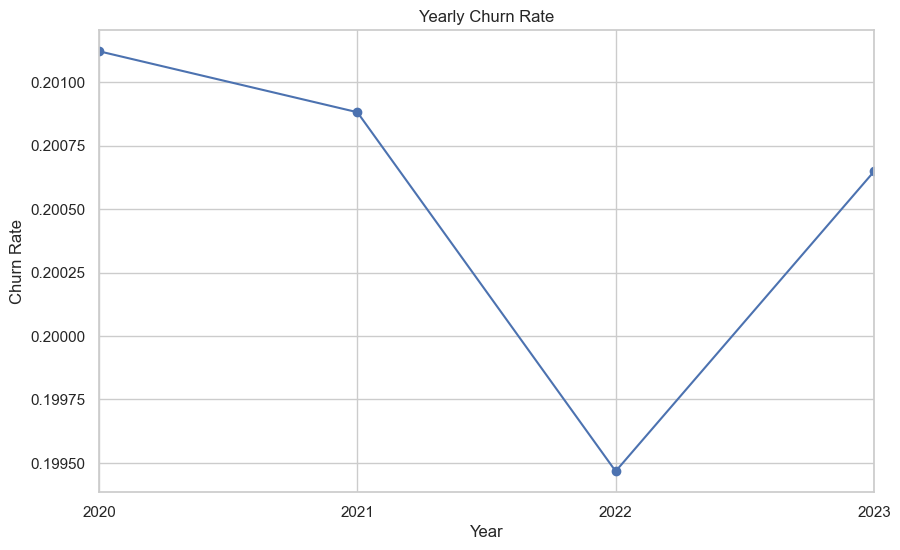

In [20]:
# Yearly Churn Rate
df.groupby("Year")["Churn"].mean().plot(kind='line', marker='o')
plt.title("Yearly Churn Rate")
plt.ylabel("Churn Rate")
plt.xlabel("Year")
plt.show()


## 6. RFM Analysis

In [21]:
recency = last_pur_date.copy() 

In [22]:
del last_pur_date

In [23]:
recency # Will give us the last purchase date for each customer

Customer Name
Aaron Alexander   2023-01-08 20:32:57
Aaron Archer      2022-10-16 20:06:59
Aaron Armstrong   2023-02-17 07:43:56
Aaron Avery       2023-05-03 03:45:14
Aaron Avila       2023-08-28 18:51:46
                          ...        
Zoe Myers         2023-08-02 05:16:20
Zoe Torres        2021-04-22 05:55:27
Zoe Walker        2021-11-14 20:27:43
Zoe Watson        2022-10-30 22:51:39
Zoe Young         2020-12-25 04:33:36
Name: Purchase Date, Length: 39878, dtype: datetime64[ns]

In [24]:
df

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Year,Month,Synthetic Order ID
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,Female,0,2023-01-01,5,John Rivera_2023-05-03 21:30:02
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,Female,0,2021-01-01,5,John Rivera_2021-05-16 13:57:44
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,Female,0,2020-01-01,7,John Rivera_2020-07-13 06:16:57
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,Female,0,2023-01-01,1,John Rivera_2023-01-17 13:14:36
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,Female,0,2021-01-01,5,John Rivera_2021-05-01 11:29:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0,Gabriel Williams,Male,0,2023-01-01,1,Gabriel Williams_2023-01-24 12:32:18
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1,Barry Foster,Female,0,2021-01-01,6,Barry Foster_2021-06-04 05:45:25
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,0,Lisa Johnson,Female,0,2022-01-01,11,Lisa Johnson_2022-11-10 17:11:57
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1,Melissa Fernandez,Male,0,2021-01-01,6,Melissa Fernandez_2021-06-27 14:42:12


In [25]:
frequency = df.groupby("Customer Name")['Purchase Date'].count()

In [26]:
frequency # This will give us the number of purchases per customer

Customer Name
Aaron Alexander    5
Aaron Archer       4
Aaron Armstrong    3
Aaron Avery        6
Aaron Avila        7
                  ..
Zoe Myers          6
Zoe Torres         1
Zoe Walker         2
Zoe Watson         2
Zoe Young          1
Name: Purchase Date, Length: 39878, dtype: int64

In [27]:
del total_spend

In [28]:
monetary = df.groupby("Customer Name")["Product Price"].sum()

In [29]:
monetary # This will give us the total spend per customer

Customer Name
Aaron Alexander     752
Aaron Archer        797
Aaron Armstrong     918
Aaron Avery        1866
Aaron Avila        1399
                   ... 
Zoe Myers          1802
Zoe Torres          156
Zoe Walker          644
Zoe Watson          442
Zoe Young           156
Name: Product Price, Length: 39878, dtype: int64

In [30]:
rfm = pd.DataFrame({
    "r": recency,
    "f": frequency,
    "m": monetary
})

In [31]:
rfm

,r,f,m
Customer Name,,,
Aaron Alexander,2023-01-08 20:32:57,5,752
Aaron Archer,2022-10-16 20:06:59,4,797
Aaron Armstrong,2023-02-17 07:43:56,3,918
Aaron Avery,2023-05-03 03:45:14,6,1866
Aaron Avila,2023-08-28 18:51:46,7,1399
...,...,...,...
Zoe Myers,2023-08-02 05:16:20,6,1802
Zoe Torres,2021-04-22 05:55:27,1,156
Zoe Walker,2021-11-14 20:27:43,2,644


In [32]:
del recency, frequency, monetary

In [33]:
rfm

,r,f,m
Customer Name,,,
Aaron Alexander,2023-01-08 20:32:57,5,752
Aaron Archer,2022-10-16 20:06:59,4,797
Aaron Armstrong,2023-02-17 07:43:56,3,918
Aaron Avery,2023-05-03 03:45:14,6,1866
Aaron Avila,2023-08-28 18:51:46,7,1399
...,...,...,...
Zoe Myers,2023-08-02 05:16:20,6,1802
Zoe Torres,2021-04-22 05:55:27,1,156
Zoe Walker,2021-11-14 20:27:43,2,644


In [34]:
rfm['R_Score'] = pd.qcut(rfm['r'], 4, labels=[4, 3, 2, 1])  # lower recency is better
rfm['F_Score'] = pd.qcut(rfm['f'], 4, labels=[1, 2, 3, 4])  # higher frequency is better
rfm['M_Score'] = pd.qcut(rfm['m'], 4, labels=[1, 2, 3, 4])   # higher monetary is better

In [35]:
rfm

,r,f,m,R_Score,F_Score,M_Score
Customer Name,,,,,,
Aaron Alexander,2023-01-08 20:32:57,5,752,3,2,1
Aaron Archer,2022-10-16 20:06:59,4,797,3,1,1
Aaron Armstrong,2023-02-17 07:43:56,3,918,3,1,2
Aaron Avery,2023-05-03 03:45:14,6,1866,2,3,3
Aaron Avila,2023-08-28 18:51:46,7,1399,1,3,3
...,...,...,...,...,...,...
Zoe Myers,2023-08-02 05:16:20,6,1802,1,3,3
Zoe Torres,2021-04-22 05:55:27,1,156,4,1,1
Zoe Walker,2021-11-14 20:27:43,2,644,4,1,1


In [36]:
rfm['rfm_score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['rfm_total'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1) # This will give us a total score for each customer in
# the rfm. R = highest 4, similarly F and M. The highest total will be 12. The higher the better.

In [37]:
rfm

,r,f,m,R_Score,F_Score,M_Score,rfm_score,rfm_total
Customer Name,,,,,,,,
Aaron Alexander,2023-01-08 20:32:57,5,752,3,2,1,321,6
Aaron Archer,2022-10-16 20:06:59,4,797,3,1,1,311,5
Aaron Armstrong,2023-02-17 07:43:56,3,918,3,1,2,312,6
Aaron Avery,2023-05-03 03:45:14,6,1866,2,3,3,233,8
Aaron Avila,2023-08-28 18:51:46,7,1399,1,3,3,133,7
...,...,...,...,...,...,...,...,...
Zoe Myers,2023-08-02 05:16:20,6,1802,1,3,3,133,7
Zoe Torres,2021-04-22 05:55:27,1,156,4,1,1,411,6
Zoe Walker,2021-11-14 20:27:43,2,644,4,1,1,411,6


In [38]:
def segments(i):
    if i >=10:
        return "Champions"
    elif i >= 7:
        return 'Loyal Customers'
    elif i >= 4:
        return 'At Risk'
    else:
        return 'Lost'


In [39]:
rfm["segment"] = rfm["rfm_total"].apply(segments)

In [40]:
rfm

,r,f,m,R_Score,F_Score,M_Score,rfm_score,rfm_total,segment
Customer Name,,,,,,,,,
Aaron Alexander,2023-01-08 20:32:57,5,752,3,2,1,321,6,At Risk
Aaron Archer,2022-10-16 20:06:59,4,797,3,1,1,311,5,At Risk
Aaron Armstrong,2023-02-17 07:43:56,3,918,3,1,2,312,6,At Risk
Aaron Avery,2023-05-03 03:45:14,6,1866,2,3,3,233,8,Loyal Customers
Aaron Avila,2023-08-28 18:51:46,7,1399,1,3,3,133,7,Loyal Customers
...,...,...,...,...,...,...,...,...,...
Zoe Myers,2023-08-02 05:16:20,6,1802,1,3,3,133,7,Loyal Customers
Zoe Torres,2021-04-22 05:55:27,1,156,4,1,1,411,6,At Risk
Zoe Walker,2021-11-14 20:27:43,2,644,4,1,1,411,6,At Risk


Text(0.5, 0, 'Customer Segment')

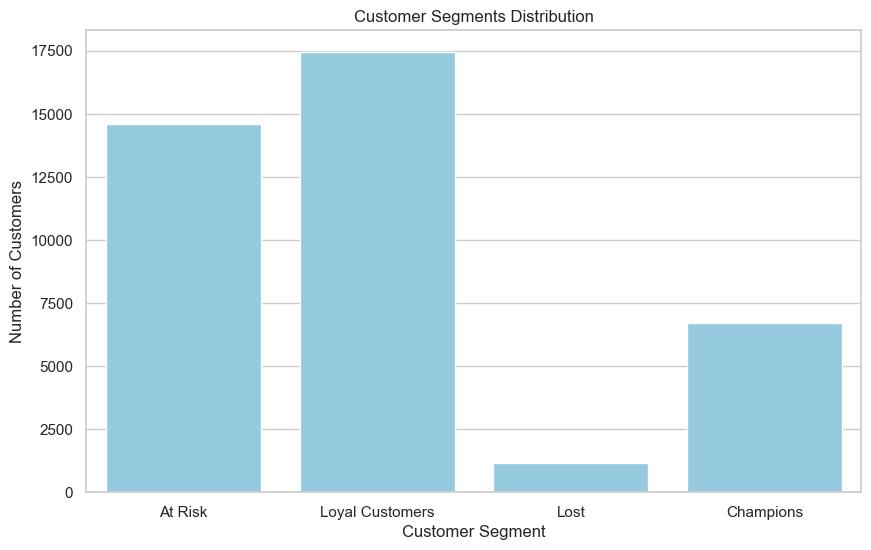

In [41]:
sns.countplot(data=rfm, x="segment", color="skyblue")
plt.title("Customer Segments Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Segment")

In [42]:
rfm.shape[0]

39878

In [43]:
rfm[rfm["segment"]=="Loyal Customers"].count()/ rfm.shape[0] * 100

r            43.74091
f            43.74091
m            43.74091
R_Score      43.74091
F_Score      43.74091
M_Score      43.74091
rfm_score    43.74091
rfm_total    43.74091
segment      43.74091
dtype: float64

## 7. Cohort Analysis

In [44]:
df.columns

Index(['Purchase Date', 'Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Customer Name', 'Gender', 'Churn', 'Year', 'Month',
       'Synthetic Order ID'],
      dtype='object')

In [45]:
rfm

,r,f,m,R_Score,F_Score,M_Score,rfm_score,rfm_total,segment
Customer Name,,,,,,,,,
Aaron Alexander,2023-01-08 20:32:57,5,752,3,2,1,321,6,At Risk
Aaron Archer,2022-10-16 20:06:59,4,797,3,1,1,311,5,At Risk
Aaron Armstrong,2023-02-17 07:43:56,3,918,3,1,2,312,6,At Risk
Aaron Avery,2023-05-03 03:45:14,6,1866,2,3,3,233,8,Loyal Customers
Aaron Avila,2023-08-28 18:51:46,7,1399,1,3,3,133,7,Loyal Customers
...,...,...,...,...,...,...,...,...,...
Zoe Myers,2023-08-02 05:16:20,6,1802,1,3,3,133,7,Loyal Customers
Zoe Torres,2021-04-22 05:55:27,1,156,4,1,1,411,6,At Risk
Zoe Walker,2021-11-14 20:27:43,2,644,4,1,1,411,6,At Risk


In [46]:
df

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Year,Month,Synthetic Order ID
0,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,Female,0,2023-01-01,5,John Rivera_2023-05-03 21:30:02
1,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,Female,0,2021-01-01,5,John Rivera_2021-05-16 13:57:44
2,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,Female,0,2020-01-01,7,John Rivera_2020-07-13 06:16:57
3,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,Female,0,2023-01-01,1,John Rivera_2023-01-17 13:14:36
4,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,Female,0,2021-01-01,5,John Rivera_2021-05-01 11:29:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0,Gabriel Williams,Male,0,2023-01-01,1,Gabriel Williams_2023-01-24 12:32:18
249996,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1,Barry Foster,Female,0,2021-01-01,6,Barry Foster_2021-06-04 05:45:25
249997,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,0,Lisa Johnson,Female,0,2022-01-01,11,Lisa Johnson_2022-11-10 17:11:57
249998,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1,Melissa Fernandez,Male,0,2021-01-01,6,Melissa Fernandez_2021-06-27 14:42:12


In [47]:
cohort = df[["Customer Name" , "Customer Age", "Purchase Date", "Product Category", "Product Price","Quantity", "Churn"]].copy()

In [48]:
cohort

,Customer Name,Customer Age,Purchase Date,Product Category,Product Price,Quantity,Churn
0,John Rivera,31,2023-05-03 21:30:02,Home,177,1,0
1,John Rivera,31,2021-05-16 13:57:44,Electronics,174,3,0
2,John Rivera,31,2020-07-13 06:16:57,Books,413,1,0
3,John Rivera,31,2023-01-17 13:14:36,Electronics,396,3,0
4,John Rivera,31,2021-05-01 11:29:27,Books,259,4,0
...,...,...,...,...,...,...,...
249995,Gabriel Williams,63,2023-01-24 12:32:18,Home,436,1,0
249996,Barry Foster,66,2021-06-04 05:45:25,Electronics,233,1,0
249997,Lisa Johnson,63,2022-11-10 17:11:57,Electronics,441,5,0
249998,Melissa Fernandez,64,2021-06-27 14:42:12,Electronics,44,2,0


In [49]:
df["Customer Age"].value_counts()

Customer Age
47    5041
22    5009
43    4975
20    4934
26    4921
19    4911
24    4878
23    4865
57    4861
36    4837
31    4829
30    4818
69    4810
54    4799
21    4797
25    4796
37    4792
18    4788
34    4785
46    4785
68    4782
28    4776
27    4763
45    4762
29    4757
56    4739
35    4731
61    4704
66    4702
63    4701
64    4692
67    4692
62    4682
51    4677
49    4662
42    4654
65    4652
44    4642
59    4640
60    4631
33    4627
52    4622
38    4621
32    4607
70    4597
41    4560
53    4547
55    4527
40    4502
50    4494
39    4480
48    4340
58    4204
Name: count, dtype: int64

In [50]:
def age(i):
    if i < 20:
        return "0-19"
    if i >=20 and i < 30:
        return "20-29"  
    if i >=30 and i < 40:
        return "30-39"
    if i >=40 and i < 50:
        return "40-49"
    if i >=50 and i < 60:
        return "50-59"

In [51]:
df["Customer Group"] = df["Customer Age"].apply(age)

In [52]:
df[["Customer Age" , "Customer Group"]]

,Customer Age,Customer Group
0,31,30-39
1,31,30-39
2,31,30-39
3,31,30-39
4,31,30-39
...,...,...
249995,63,None
249996,66,None
249997,63,None
249998,64,None


In [53]:
cohort

,Customer Name,Customer Age,Purchase Date,Product Category,Product Price,Quantity,Churn
0,John Rivera,31,2023-05-03 21:30:02,Home,177,1,0
1,John Rivera,31,2021-05-16 13:57:44,Electronics,174,3,0
2,John Rivera,31,2020-07-13 06:16:57,Books,413,1,0
3,John Rivera,31,2023-01-17 13:14:36,Electronics,396,3,0
4,John Rivera,31,2021-05-01 11:29:27,Books,259,4,0
...,...,...,...,...,...,...,...
249995,Gabriel Williams,63,2023-01-24 12:32:18,Home,436,1,0
249996,Barry Foster,66,2021-06-04 05:45:25,Electronics,233,1,0
249997,Lisa Johnson,63,2022-11-10 17:11:57,Electronics,441,5,0
249998,Melissa Fernandez,64,2021-06-27 14:42:12,Electronics,44,2,0


In [54]:
cohort["first_purchase"] = cohort.groupby("Customer Name")["Purchase Date"].transform("min")

In [55]:
cohort

,Customer Name,Customer Age,Purchase Date,Product Category,Product Price,Quantity,Churn,first_purchase
0,John Rivera,31,2023-05-03 21:30:02,Home,177,1,0,2020-04-02 23:19:48
1,John Rivera,31,2021-05-16 13:57:44,Electronics,174,3,0,2020-04-02 23:19:48
2,John Rivera,31,2020-07-13 06:16:57,Books,413,1,0,2020-04-02 23:19:48
3,John Rivera,31,2023-01-17 13:14:36,Electronics,396,3,0,2020-04-02 23:19:48
4,John Rivera,31,2021-05-01 11:29:27,Books,259,4,0,2020-04-02 23:19:48
...,...,...,...,...,...,...,...,...
249995,Gabriel Williams,63,2023-01-24 12:32:18,Home,436,1,0,2023-01-24 12:32:18
249996,Barry Foster,66,2021-06-04 05:45:25,Electronics,233,1,0,2021-06-04 05:45:25
249997,Lisa Johnson,63,2022-11-10 17:11:57,Electronics,441,5,0,2020-02-09 07:13:06
249998,Melissa Fernandez,64,2021-06-27 14:42:12,Electronics,44,2,0,2020-05-16 07:27:05


In [56]:
cohort.dtypes

Customer Name               object
Customer Age                 int64
Purchase Date       datetime64[ns]
Product Category            object
Product Price                int64
Quantity                     int64
Churn                        int32
first_purchase      datetime64[ns]
dtype: object

In [57]:
cohort['purchase_month'] = cohort['Purchase Date'].dt.to_period('M')
cohort['cohort_month'] =cohort['first_purchase'].dt.to_period('M')

In [58]:
cohort

,Customer Name,Customer Age,Purchase Date,Product Category,Product Price,Quantity,Churn,first_purchase,purchase_month,cohort_month
0,John Rivera,31,2023-05-03 21:30:02,Home,177,1,0,2020-04-02 23:19:48,2023-05,2020-04
1,John Rivera,31,2021-05-16 13:57:44,Electronics,174,3,0,2020-04-02 23:19:48,2021-05,2020-04
2,John Rivera,31,2020-07-13 06:16:57,Books,413,1,0,2020-04-02 23:19:48,2020-07,2020-04
3,John Rivera,31,2023-01-17 13:14:36,Electronics,396,3,0,2020-04-02 23:19:48,2023-01,2020-04
4,John Rivera,31,2021-05-01 11:29:27,Books,259,4,0,2020-04-02 23:19:48,2021-05,2020-04
...,...,...,...,...,...,...,...,...,...,...
249995,Gabriel Williams,63,2023-01-24 12:32:18,Home,436,1,0,2023-01-24 12:32:18,2023-01,2023-01
249996,Barry Foster,66,2021-06-04 05:45:25,Electronics,233,1,0,2021-06-04 05:45:25,2021-06,2021-06
249997,Lisa Johnson,63,2022-11-10 17:11:57,Electronics,441,5,0,2020-02-09 07:13:06,2022-11,2020-02
249998,Melissa Fernandez,64,2021-06-27 14:42:12,Electronics,44,2,0,2020-05-16 07:27:05,2021-06,2020-05


In [59]:
cohort['cohort_index'] = (cohort['purchase_month'] - cohort['cohort_month']).apply(lambda x: x.n)

In [60]:
cohort

,Customer Name,Customer Age,Purchase Date,Product Category,Product Price,Quantity,Churn,first_purchase,purchase_month,cohort_month,cohort_index
0,John Rivera,31,2023-05-03 21:30:02,Home,177,1,0,2020-04-02 23:19:48,2023-05,2020-04,37
1,John Rivera,31,2021-05-16 13:57:44,Electronics,174,3,0,2020-04-02 23:19:48,2021-05,2020-04,13
2,John Rivera,31,2020-07-13 06:16:57,Books,413,1,0,2020-04-02 23:19:48,2020-07,2020-04,3
3,John Rivera,31,2023-01-17 13:14:36,Electronics,396,3,0,2020-04-02 23:19:48,2023-01,2020-04,33
4,John Rivera,31,2021-05-01 11:29:27,Books,259,4,0,2020-04-02 23:19:48,2021-05,2020-04,13
...,...,...,...,...,...,...,...,...,...,...,...
249995,Gabriel Williams,63,2023-01-24 12:32:18,Home,436,1,0,2023-01-24 12:32:18,2023-01,2023-01,0
249996,Barry Foster,66,2021-06-04 05:45:25,Electronics,233,1,0,2021-06-04 05:45:25,2021-06,2021-06,0
249997,Lisa Johnson,63,2022-11-10 17:11:57,Electronics,441,5,0,2020-02-09 07:13:06,2022-11,2020-02,33
249998,Melissa Fernandez,64,2021-06-27 14:42:12,Electronics,44,2,0,2020-05-16 07:27:05,2021-06,2020-05,13


In this the first pur represents the cust joining and first purchase. Purchase month represents the purchases made, here in row1 after making first pur in 2020-04 made another pur in 2023-05. Cohort mon represents the first pur for each cust. Now, cohort index = purch mon - cohort mon(first pur). It came out to be 37. This means after making first pur the cust was active on month 37 of their lifecycle.

In [61]:
cohort_data = cohort.groupby(["cohort_month", "cohort_index"])["Customer Name"].nunique().reset_index()

In [62]:
cohort_data.rename(columns={"Customer Name": "num_customers"}, inplace=True)

In [63]:
cohort_data

,cohort_month,cohort_index,num_customers
0,2020-01,0,5219
1,2020-01,1,811
2,2020-01,2,838
3,2020-01,3,828
4,2020-01,4,842
...,...,...,...
1028,2023-07,1,2
1029,2023-07,2,3
1030,2023-08,0,33
1031,2023-08,1,1


Cohort month rep the cust who made their first purchase. Cohort index represent after how many months we retained our cust. Num cust represents the number of uniques cust.
Now, 5219 cust made their first pur/cohort month of jan. Thus cohort index = 0.
Now, after 1 month 811 cust were retained thus cohort index =1, means in feb.
Now, cohort month will change only when new cust make purchases on feb.